In [23]:
# Jack's car rental problem
# Policy Iteration is preferable for large action space while Value Iteration is preferable for smaller action space. 
# However, value iteration implementation is simpler than policy iteration improvement.
# Credit to Nguyen Dang Quang, PhD Student, Kyung Hee University, Suwon, Korea.

import numpy as np
from math import *

MAX_CARS = 20
MAX_MOVE_OF_CARS = 5

CAR_REQUEST_LOC_1 = 3
CAR_REQUEST_LOC_2 = 4

CAR_RETURN_LOC_1 = 3
CAR_RETURN_LOC_2 = 2

#To make it simple, First I assume that the demand/return everyday is a fixed number instead of following the Poisson Distribution

DISCOUNT_RATE = 0.9

DAILY_RATE = 10
MOVE_COST = 2

# Location 1 has i cars and location 2 has j car. The state is then [i,j]
state = []
for i in range(MAX_CARS + 1):
  for j in range(MAX_CARS + 1):
    state.append([i,j])
print('State')
print(state)

# After perform action a, state [i,j] will change to state[i+a, j-a]
action = range(-MAX_MOVE_OF_CARS, MAX_MOVE_OF_CARS + 1)
print('Action')
print(action)

print('Value')
value = np.zeros([MAX_CARS + 1, MAX_CARS + 1])
print(value)

print('Policy')
policy = np.zeros([MAX_CARS + 1, MAX_CARS + 1])
print(policy)

State
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [2, 20], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [4, 20], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], 

In [24]:
def findMax(V, current_state, gamma, actions):
  max_value = -999999
  max_a = 0
  for a in actions:
    real_request_loc_1 = min(CAR_REQUEST_LOC_1, current_state[0])
    real_request_loc_2 = min(CAR_REQUEST_LOC_2, current_state[1])
    if ((current_state[0] - real_request_loc_1 + a + CAR_RETURN_LOC_1) in range(MAX_CARS+1)) and ((current_state[1] - real_request_loc_2 - a + CAR_RETURN_LOC_2) in range(MAX_CARS+1)):
      reward = (real_request_loc_1 + real_request_loc_2) * DAILY_RATE - MOVE_COST * np.abs(a)
      i = current_state[0]
      j = current_state[1]
      i_ = current_state[0]-real_request_loc_1 + a + CAR_RETURN_LOC_1
      j_ = current_state[1]-real_request_loc_2 - a + CAR_RETURN_LOC_2
      temp_value = reward + gamma * V[i_, j_]
      if temp_value > max_value:
        # print("TEMP VALUE = {} VS MAX = {} ".format(temp_value, max_value))
        max_value = temp_value
        max_a = a
  return max_value, max_a


max_value, max_action = findMax(value, [10, 0], 0.9, action)
print("Test Max_value = ", max_value)
print("Test Max_action = ", max_action)

Test Max_value =  30.0
Test Max_action =  0


In [27]:
# Value Iteration
optimal_policy = np.copy(policy)
value1 = np.copy(value)
convergence = False
theta = 0.001

while (not convergence):
  delta = 0
  for s in state:
    new_value, new_action = findMax(value1, s, 0.9, action)
    if (new_value > value1[s[0], s[1]]):
      optimal_policy[s[0], s[1]] = new_action
      delta = max(delta, np.abs(value1[s[0],s[1]] - new_value))
      value1[s[0],s[1]] = new_value
  print('Delta = ', delta)
  if delta < theta:
    convergence = True
  

Delta =  638.6107636128394
Delta =  472.83375558267585
Delta =  118.8698016571307
Delta =  41.44733701680474
Delta =  15.049311783205269
Delta =  9.208401069870263
Delta =  5.528211786936481
Delta =  3.6270597534090143
Delta =  2.7586334586934527
Delta =  2.234493101541716
Delta =  1.8999681117098817
Delta =  1.7099713005388821
Delta =  1.5389741704850053
Delta =  1.3850767534365218
Delta =  1.2465690780928753
Delta =  1.121912170283565
Delta =  1.0097209532552256
Delta =  0.9087488579297087
Delta =  0.8178739721367378
Delta =  0.7360865749230356
Delta =  0.6624779174307491
Delta =  0.5962301256876685
Delta =  0.5366071131189187
Delta =  0.48294640180699844
Delta =  0.4346517616262986
Delta =  0.3911865854636858
Delta =  0.35206792691730016
Delta =  0.3168611342255758
Delta =  0.2851750208030239
Delta =  0.2566575187227045
Delta =  0.23099176685042266
Delta =  0.20789259016538608
Delta =  0.1871033311488759
Delta =  0.168392998033994
Delta =  0.15155369823060028
Delta =  0.136398328407

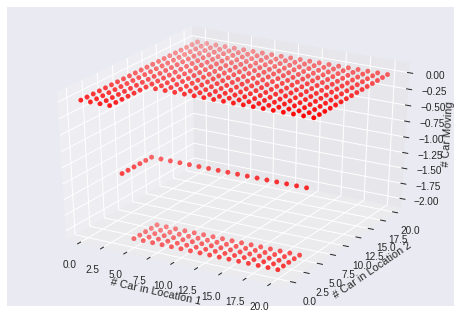

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []
for s in state:
  x.append(s[0])
  y.append(s[1])
  z.append(optimal_policy[s[0], s[1]])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('# Car in Location 1')
ax.set_ylabel('# Car in Location 2')
ax.set_zlabel('# Car Moving')

plt.show()

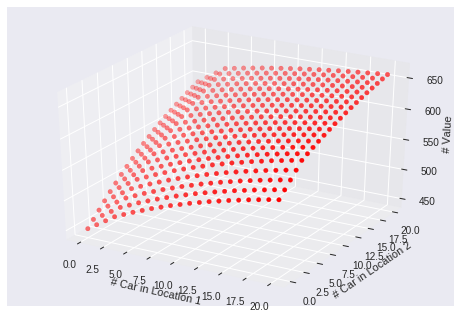

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []
for s in state:
  x.append(s[0])
  y.append(s[1])
  z.append(value1[s[0], s[1]])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('# Car in Location 1')
ax.set_ylabel('# Car in Location 2')
ax.set_zlabel('# Value')

plt.show()